<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/WPI_PyImptetus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Source: Atif Hassan**

https://github.com/atif-hassan

https://github.com/atif-hassan/PyImpetus

In [1]:
pip install PyImpetus

**Regression**

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import math
import numpy as np
import pandas as pd
from collections import Counter
from PyImpetus import PPIMBR
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import time

In [5]:
# Load the data into a dataframe
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
# Pre-process the data
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df = df.drop(["WQC"], axis=1)
#remove NaN values
data=df.dropna()
# Lets check it out
display(data.head())
# Split the data into input features and target variable
data, Y = data.drop(["WPI"], axis=1), data["WPI"].values
# Lets check out the shape of our data
print("Data shape: ", data.shape, "Target Variable shape: ", Y.shape)

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


Data shape:  (485, 14) Target Variable shape:  (485,)


**Modelling with Decision Tree without PyImpetus**

In [6]:
# Use Train-test split for understanding the performance of PyImpetus
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=27, shuffle=True)
# We want to time our algorithm
start = time.time()

# Convert the data into numpy arrays
x_train, x_test = x_train.values, x_test.values

model = DecisionTreeRegressor(random_state=27)
model.fit(x_train, y_train)
preds = model.predict(x_test)
score = mean_squared_error(y_test, preds)
print("MSE: ", score)
end = time.time()
print("Time Required (in seconds): ", end-start)

MSE:  0.0013738543561080969
Time Required (in seconds):  0.009871959686279297


**Classification**

In [7]:
# Load the data into a dataframe
df1 = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
# Pre-process the data
df1['WQC'] = df1['WQC'].str.replace("Excellent", '0').replace("Good", '1').replace("moderately polluted water", '2').replace("highly polluted water", '3')
df1.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df1 = df1.drop(["WPI"], axis=1)
#remove NaN values
data1=df1.dropna()
# Lets check it out
display(data1.head())
# Split the data into input features and target variable
data1, Y = data1.drop(['WQC'], axis=1), data1['WQC'].values
# Lets check out the shape of our data
print("Data shape: ", data1.shape, "Target Variable shape: ", Y.shape)

,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0


Data shape:  (485, 15) Target Variable shape:  (485,)


**Modelling with Decision Tree without PyImpetus**

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(data1):
    # Split data into train and test based on folds
    x_train, x_test = data1.iloc[train], data1.iloc[test]
    y_train, y_test = Y[train], Y[test]
    
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)

Score:  0.979381443298969
Score:  0.9587628865979382
Score:  0.9896907216494846
Score:  0.9381443298969072
Score:  0.9690721649484536


Average Accuracy:  0.9670103092783506


Total Time Required (in seconds):  0.03092169761657715


**Modelling with Decision Tree (fast but less robust feature subset selection)**

In [12]:
from PyImpetus import PPIMBC

In [14]:
from sklearn.linear_model import LogisticRegression

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done

Markov Blanket:  ['TDS', 'Cl', 'Ca', 'EC', 'Phosphate', 'Sulphate', 'F', 'K', 'Na', 'Mg']
Feature importance:  [21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.453657696871723, 21.393166404737244, 14.992060201653041, 10.611944345616822, 5.600911970083961, 3.1188295018676317]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


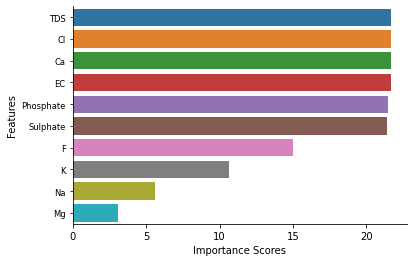

Score:  0.979381443298969


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50

Markov Blanket:  ['TDS', 'EC', 'Sulphate', 'Cl', 'Ca', 'Phosphate', 'Alkalinity', 'F', 'Na', 'Mg']
Feature importance:  [21.69653315944471, 21.69653315944471, 21.69653315944471, 21.63567773784041, 21.453657696871723, 21.2122386092467, 20.496715717895157, 12.202380454260053, 7.384063042173385, 4.439954475855965]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


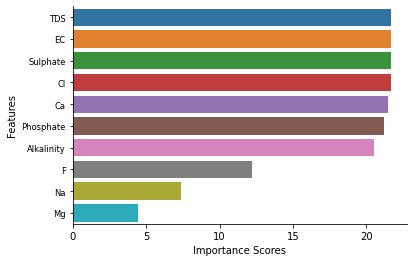

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Score:  0.9690721649484536


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out o

Markov Blanket:  ['Sulphate', 'TDS', 'Ca', 'Phosphate', 'EC', 'Cl', 'Alkalinity', 'Nitrate', 'F', 'Na']
Feature importance:  [21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.63567773784041, 20.496715717895157, 18.372893407929457, 9.528233085566558, 7.865194887224323, 7.622487480053512]


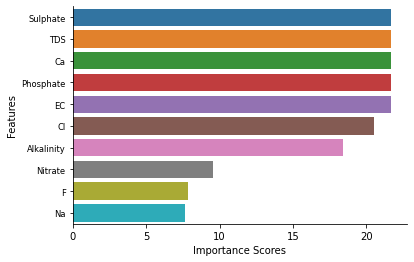

Score:  0.979381443298969


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend 

Markov Blanket:  ['Phosphate', 'TDS', 'Nitrate', 'Ca', 'EC', 'Sulphate', 'Cl', 'Na']
Feature importance:  [21.69653315944471, 21.57491335748366, 21.2122386092467, 20.733768013814128, 20.555842388639267, 17.87507059038887, 7.3167272870534035, 3.5873573276550252]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


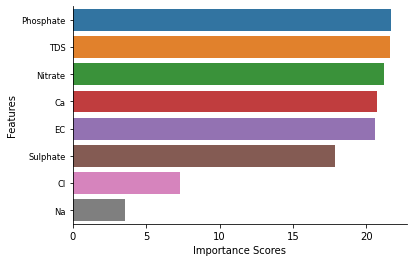

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Score:  0.9587628865979382


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out o

Markov Blanket:  ['Sulphate', 'Cl', 'TDS', 'EC', 'Phosphate', 'Ca', 'Alkalinity', 'F', 'K', 'Na']
Feature importance:  [21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.514240012470054, 14.793039934994846, 13.77181564837698, 6.5990064023030595, 4.7744336048832166]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


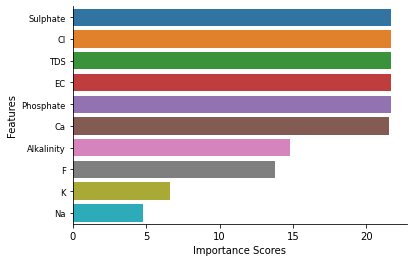

Score:  0.979381443298969


Average Accuracy:  0.9731958762886597


Total Time Required (in seconds):  235.27845454216003


In [15]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(data1):
    # Split data into train and test based on folds
    x_train, x_test = data1.iloc[train], data1.iloc[test]
    y_train, y_test = Y[train], Y[test]

    # Create a PyImpetus classification object and initialize with required parameters
    # NOTE: To achieve fast selection, set cv=0 for disabling the use of any internal cross-validation
    model = PPIMBC(LogisticRegression(random_state=27), cv=0, num_simul=50, random_state=27, verbose=2)
    # Fit this above object on the train part and transform the train dataset into selected feature subset
    # NOTE: x_train has to be a dataframe and y_train has to be a numpy array
    x_train = model.fit_transform(x_train, y_train)
    # Transform the test set as well
    # NOTE: x_test has to be a dataframe
    x_test = model.transform(x_test)
    # Check out the features selected
    print("Markov Blanket: ", model.MB)
    # Check out the scores of each feature. The scores are in order of the selected feature list
    # NOTE: You can use these scores ina feature selection ensemble
    print("Feature importance: ", model.feat_imp_scores)
    # Plot the feature importance scores
    model.feature_importance()
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)

**Modelling with Decision Tree (slow but accurate feature subset selection)**